**PROBLEM STATEMENT**

 **This dataset is designed for predicting food delivery times based on various influencing factors such as distance, weather, traffic conditions, and time of day. It offers a practical and engaging challenge for machine learning practitioners, especially those interested in logistics and operations research.**


Linear Regression

LIBRARIES

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns



LOAD DATASET

In [2]:
data = pd.read_csv("https://drive.google.com/uc?export=download&id=1NgECHQp50QCwH_7BRZWQBQdhCjLuub7G")


In [3]:
data.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [5]:
data["Time_of_Day"].unique()

array(['Afternoon', 'Evening', 'Night', 'Morning', nan], dtype=object)

Data Preprocessing

1)HANDLING THE MISSING DATA

VISUALIZATION

In [6]:
data.drop(columns="Order_ID",inplace=True)
categorical_columns = data.select_dtypes(include=["object"]).columns
continous_columns = data.select_dtypes(include=["float64","int64"]).columns

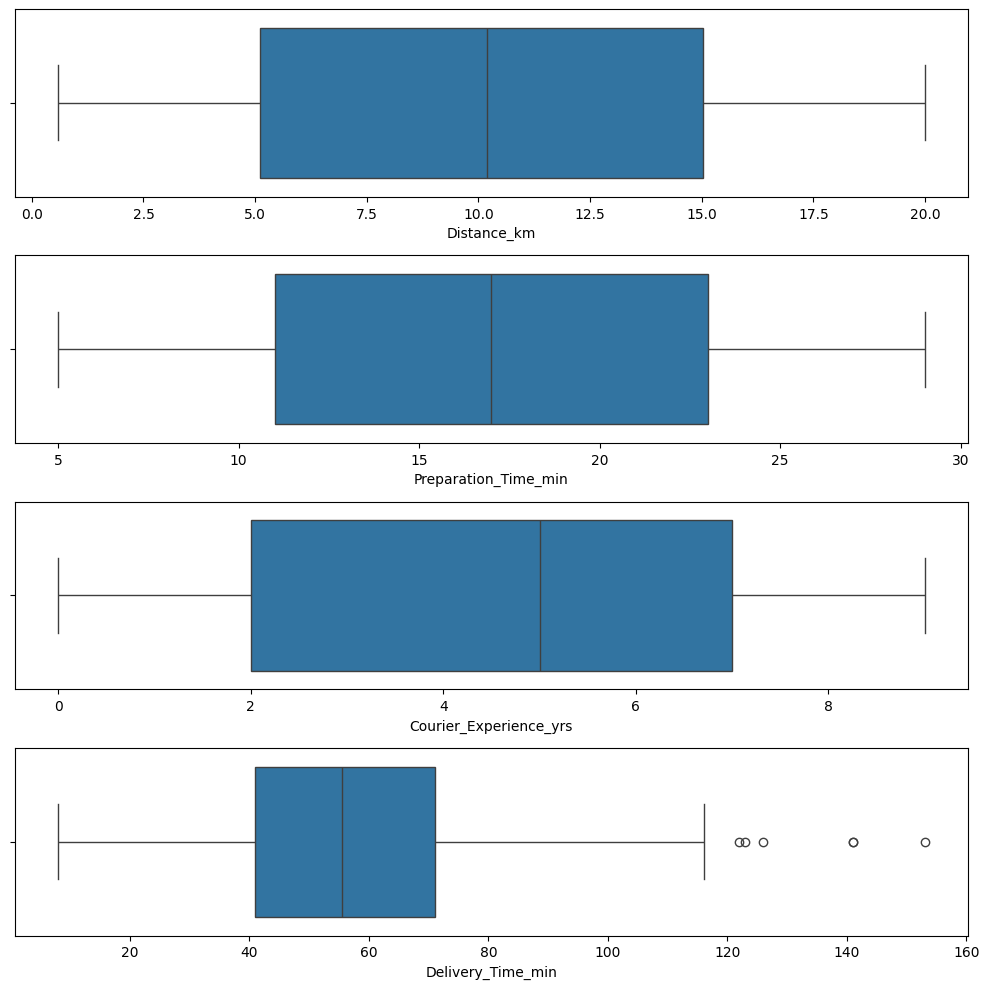

In [7]:
fig,axs=plt.subplots(4,1,figsize=(10,10))
for i ,col in enumerate(continous_columns):
  sns.boxplot(data=data,x=col,ax=axs[i])
plt.tight_layout()
plt.show()


In [8]:



for col in continous_columns:
  data[col].fillna(data[col].median(),inplace=True)


for col in categorical_columns:
  data[col].fillna(data[col].mode()[0],inplace=True)


<ipython-input-8-3b45f581f4ee>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(),inplace=True)
<ipython-input-8-3b45f581f4ee>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Distance_km             1000 non-null   float64
 1   Weather                 1000 non-null   object 
 2   Traffic_Level           1000 non-null   object 
 3   Time_of_Day             1000 non-null   object 
 4   Vehicle_Type            1000 non-null   object 
 5   Preparation_Time_min    1000 non-null   int64  
 6   Courier_Experience_yrs  1000 non-null   float64
 7   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


DROPPING OUTLIERS

In [10]:
Q1 = data['Delivery_Time_min'].quantile(0.25)
Q3 = data['Delivery_Time_min'].quantile(0.75)


IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data=data.loc[(data["Delivery_Time_min"]>=lower_bound) & (data["Delivery_Time_min"]<=upper_bound)]
data = data.reset_index(drop=True)
data.shape


(994, 8)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Distance_km             994 non-null    float64
 1   Weather                 994 non-null    object 
 2   Traffic_Level           994 non-null    object 
 3   Time_of_Day             994 non-null    object 
 4   Vehicle_Type            994 non-null    object 
 5   Preparation_Time_min    994 non-null    int64  
 6   Courier_Experience_yrs  994 non-null    float64
 7   Delivery_Time_min       994 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 62.2+ KB


In [12]:
data.duplicated().sum()

0

Drop duplicated values

In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data["Vehicle_Type"].unique()

array(['Scooter', 'Bike', 'Car'], dtype=object)

ENCODING

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder()

data['Traffic_Level']=data['Traffic_Level'].map({'Low':0,'Medium':1,'High':2})
data['Vehicle_Type']=data['Vehicle_Type'].map({'Scooter':0,'Bike':1,'Car':2})
data['Time_of_Day']=data['Time_of_Day'].map({'Morning':0,'Afternoon':1,'Evening':2,"Night":3})
for col in categorical_columns:
  if col in ["Weather"]:
    encoded_col = one_hot_encoder.fit_transform(data[[col]]).toarray()

    encoded_df = pd.DataFrame(encoded_col, columns=one_hot_encoder.get_feature_names_out([col]))

    data=data.drop(col,axis=1)
    data = data.join(encoded_df)
  elif col not in["Vehicle_Type","Weather","Traffic_Level","Time_of_Day"]:
    data[col]=label_encoder.fit_transform(data[col])


In [16]:
data.corr()

,Distance_km,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Clear,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy
Distance_km,1.000000,0.010175,-0.041244,0.018046,-0.013415,-0.005914,0.788343,-0.051335,-0.023860,0.028846,0.075548,-0.003697
Traffic_Level,0.010175,1.000000,0.015530,-0.054436,-0.025992,0.041983,0.201855,-0.010900,-0.030997,0.011486,-0.027751,0.062958
Time_of_Day,-0.041244,0.015530,1.000000,-0.027430,0.037023,0.022399,-0.001982,-0.003088,0.027182,0.027112,0.016658,-0.076846
Vehicle_Type,0.018046,-0.054436,-0.027430,1.000000,-0.014110,-0.004160,0.030738,-0.073720,0.000415,0.009859,0.075217,0.035529
Preparation_Time_min,-0.013415,-0.025992,0.037023,-0.014110,1.000000,-0.027556,0.307307,0.012571,-0.015516,0.016706,0.020194,-0.048542
Courier_Experience_yrs,-0.005914,0.041983,0.022399,-0.004160,-0.027556,1.000000,-0.086789,-0.051091,-0.054361,0.071914,0.012063,0.032637
Delivery_Time_min,0.788343,0.201855,-0.001982,0.030738,0.307307,-0.086789,1.000000,-0.170785,0.051202,0.066515,0.167780,-0.023017
Weather_Clear,-0.051335,-0.010900,-0.003088,-0.073720,0.012571,-0.051091,-0.170785,1.000000,-0.340001,-0.505025,-0.328844,-0.325074
Weather_Foggy,-0.023860,-0.030997,0.027182,0.000415,-0.015516,-0.054361,0.051202,-0.340001,1.000000,-0.171709,-0.111807,-0.110525
Weather_Rainy,0.028846,0.011486,0.027112,0.009859,0.016706,0.071914,0.066515,-0.505025,-0.171709,1.000000,-0.166074,-0.164170


SCALING

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

print(data.columns)


Index(['Distance_km', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type',
       'Preparation_Time_min', 'Courier_Experience_yrs', 'Delivery_Time_min',
       'Weather_Clear', 'Weather_Foggy', 'Weather_Rainy', 'Weather_Snowy',
       'Weather_Windy'],
      dtype='object')


<ipython-input-18-185ebfa5319a>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col],ax=axs[i],shade=True)
<ipython-input-18-185ebfa5319a>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col],ax=axs[i],shade=True)
<ipython-input-18-185ebfa5319a>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col],ax=axs[i],shade=True)
<ipython-input-18-185ebfa5319a>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col],ax=axs[i],shade=True)


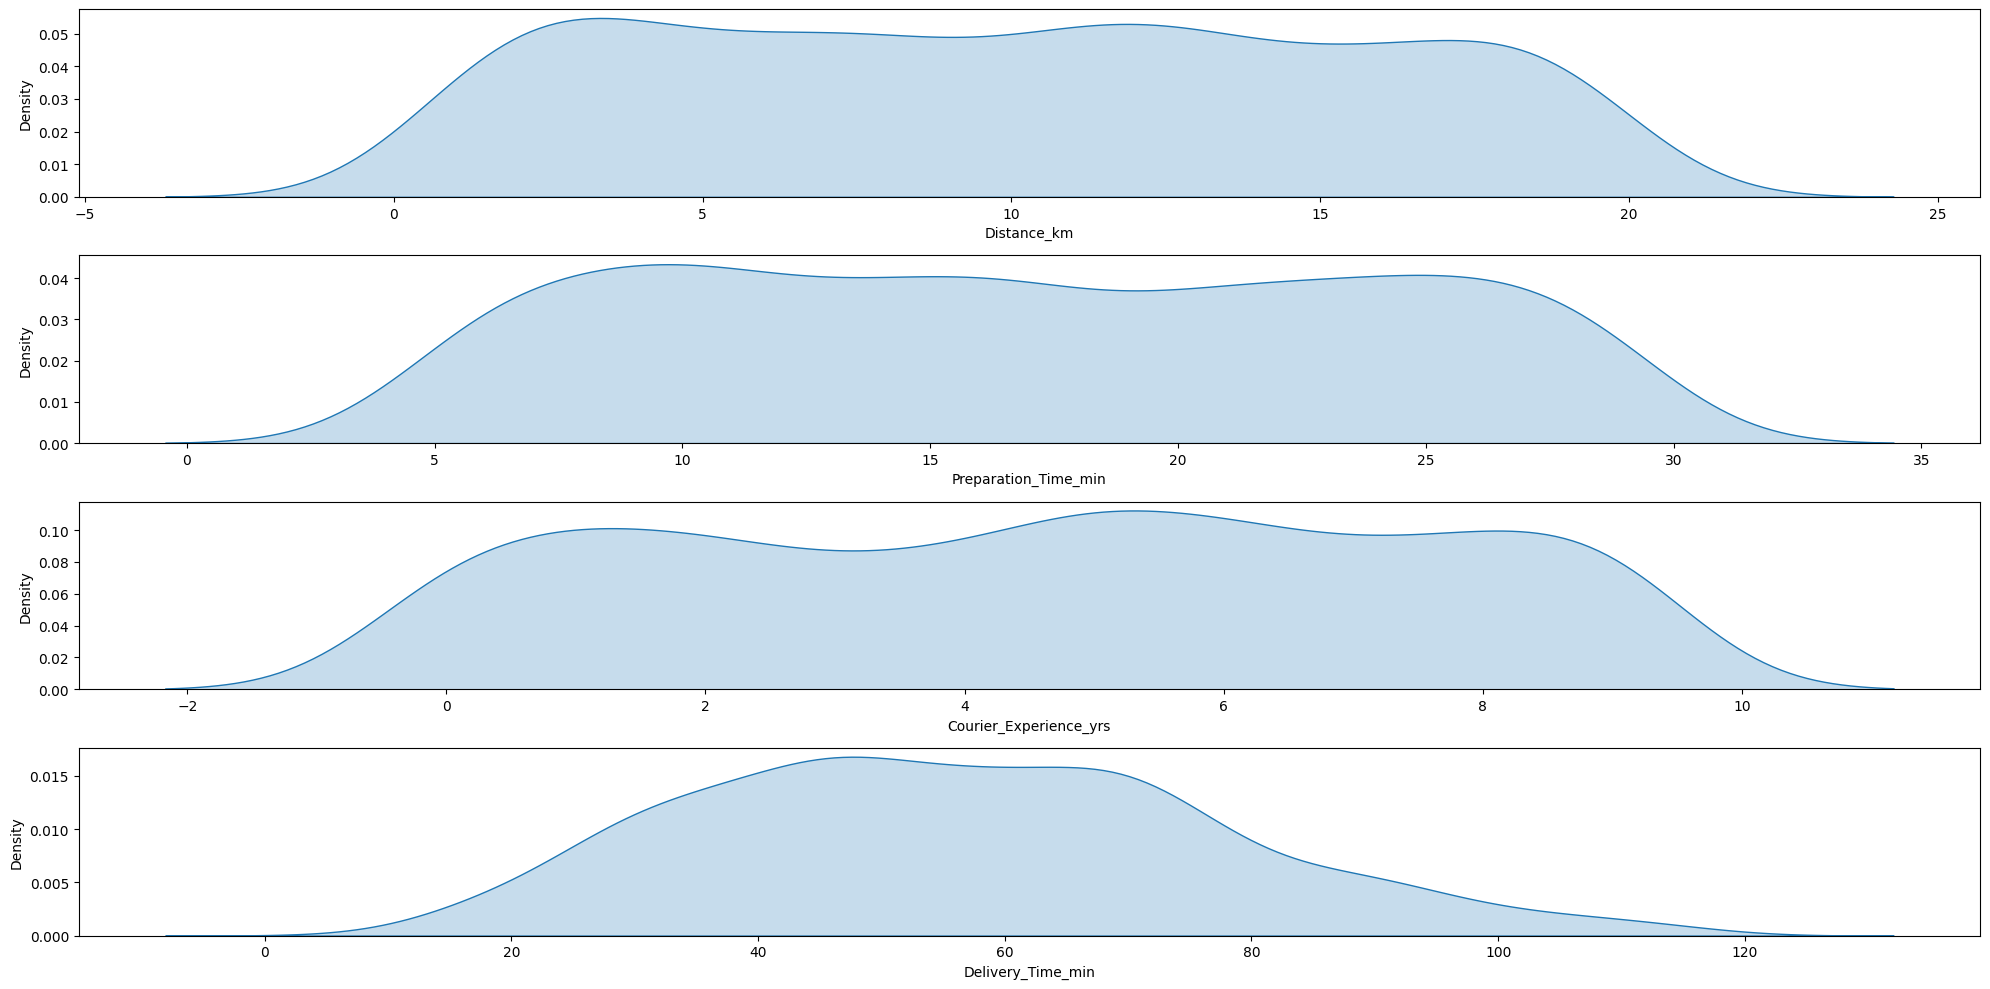

In [18]:
# Density plot
fig , axs =plt.subplots(4,1,figsize=(20,10))

for i,col in enumerate(continous_columns):
  sns.kdeplot(data[col],ax=axs[i],shade=True)
  axs[i].set_xlabel(col)
plt.tight_layout()
plt.show()


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data[continous_columns]=scaler.fit_transform(data[continous_columns])

In [20]:
data.isna().sum()

,0
Distance_km,0
Traffic_Level,0
Time_of_Day,0
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,0
Delivery_Time_min,0
Weather_Clear,0
Weather_Foggy,0
Weather_Rainy,0


TRAIN AND TESTING SPLIT

In [21]:
from sklearn.model_selection import train_test_split

X = data.drop(['Delivery_Time_min'],axis=1)
y =data['Delivery_Time_min']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


**MODEL**

In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)


Evaluate The Model

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 0.2631854445242068
Mean Squared Error: 0.16295031801161639
R-squared: 0.8512725646051961


VISUALIZATION

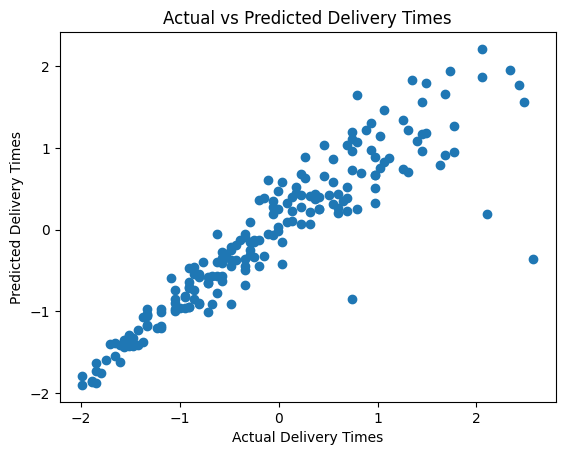

In [24]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Delivery Times')
plt.ylabel('Predicted Delivery Times')
plt.title('Actual vs Predicted Delivery Times')
plt.show()